In [1]:
yeast_p = "yeast.data"
import pandas as pd
yeast_initial = pd.read_csv(yeast_p, sep="\s+", decimal='.', header=None , names=['sequ_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class_protein_localization'])
yeast = yeast_initial.copy()

In [2]:
yeast_f = open(yeast_p, "r")
lines = yeast_f.readlines()
yeast_f.close()

In [3]:
print("Number of rows in yeast df: ", yeast.shape)
print("Number of lines in yeast file: ", len(lines))

('Number of rows in yeast df: ', (1484, 10))
('Number of lines in yeast file: ', 1484)


In [4]:
#visual check that data has loaded correctly
print(yeast.head())
print("\n")
print(lines[0:5])
print("\n")
print(yeast.tail())
print("\n")
print(lines[1479:1483])

    sequ_name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
0  ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1  ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2  ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   
3  AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   
4  AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   

  class_protein_localization  
0                        MIT  
1                        MIT  
2                        MIT  
3                        NUC  
4                        MIT  


['ADT1_YEAST  0.58  0.61  0.47  0.13  0.50  0.00  0.48  0.22  MIT\n', 'ADT2_YEAST  0.43  0.67  0.48  0.27  0.50  0.00  0.53  0.22  MIT\n', 'ADT3_YEAST  0.64  0.62  0.49  0.15  0.50  0.00  0.53  0.22  MIT\n', 'AAR2_YEAST  0.58  0.44  0.57  0.13  0.50  0.00  0.54  0.22  NUC\n', 'AATM_YEAST  0.42  0.44  0.48  0.54  0.50  0.00  0.48  0.22  MIT\n']


       sequ_name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
1479  YUR1_YEAST  0

In [5]:
#comparing value counts of target column with documentation
print(yeast['class_protein_localization'].value_counts())
print("\n")
print("Total number of counts: ", yeast['class_protein_localization'].value_counts().sum())

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class_protein_localization, dtype: int64


('Total number of counts: ', 1484)


In [6]:
#exploring SWISS_PROT sequence name column - almost no repetition. 
#This column provides a way to reference each protein sequence analysed on the SWISS-PROT database.
yeast['sequ_name'].value_counts()

RL44_YEAST    2
RS41_YEAST    2
RS28_YEAST    2
RS4E_YEAST    2
RS22_YEAST    2
RL12_YEAST    2
RL19_YEAST    2
RL35_YEAST    2
H3_YEAST      2
RL1A_YEAST    2
RL18_YEAST    2
RS24_YEAST    2
MAT2_YEAST    2
EF1A_YEAST    2
RLUB_YEAST    2
RL2_YEAST     2
RL41_YEAST    2
H4_YEAST      2
MTC_YEAST     2
RS8_YEAST     2
RL15_YEAST    2
IF4A_YEAST    2
SPT5_YEAST    1
CYC1_YEAST    1
UBA1_YEAST    1
YHY0_YEAST    1
STH1_YEAST    1
YBY2_YEAST    1
KEM1_YEAST    1
SOF1_YEAST    1
             ..
PT17_YEAST    1
G6PI_YEAST    1
ARF2_YEAST    1
SUG1_YEAST    1
SCA1_YEAST    1
MT17_YEAST    1
ATC2_YEAST    1
PR09_YEAST    1
RAP1_YEAST    1
PR04_YEAST    1
MET4_YEAST    1
RS31_YEAST    1
YIR3_YEAST    1
PCNA_YEAST    1
PR02_YEAST    1
TSL1_YEAST    1
SYAC_YEAST    1
YB30_YEAST    1
CC40_YEAST    1
PRCZ_YEAST    1
SP10_YEAST    1
COXA_YEAST    1
PEP8_YEAST    1
UCR2_YEAST    1
POB1_YEAST    1
MBP1_YEAST    1
KC21_YEAST    1
YN70_YEAST    1
MA3R_YEAST    1
ATP7_YEAST    1
Name: sequ_name, Length:

In [7]:
#confirm no missing values
print(yeast.isna().sum())

sequ_name                     0
mcg                           0
gvh                           0
alm                           0
mit                           0
erl                           0
pox                           0
vac                           0
nuc                           0
class_protein_localization    0
dtype: int64


In [8]:
yeast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
sequ_name                     1484 non-null object
mcg                           1484 non-null float64
gvh                           1484 non-null float64
alm                           1484 non-null float64
mit                           1484 non-null float64
erl                           1484 non-null float64
pox                           1484 non-null float64
vac                           1484 non-null float64
nuc                           1484 non-null float64
class_protein_localization    1484 non-null object
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [9]:
#sanity check - values are probabilities - check between 0 and 1.0
yeast.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [10]:
#erl is stated to be a binary attribute - apparently indicated by 1.0, or 0.5
print(yeast["erl"].value_counts())

0.5    1470
1.0      14
Name: erl, dtype: int64


In [11]:
print(yeast["pox"].value_counts())

0.00    1469
0.83      11
0.50       4
Name: pox, dtype: int64


In [12]:
#sanity check using information given in ....

In [13]:
#split dataframe into target (a Series), and data (a dataframe named yeast_data)
target = yeast["class_protein_localization"]
print("Target:")
print(type(target))
print("\n")
print(target.head())
print("\n")
print("Data:")
yeast_data = yeast.drop("class_protein_localization", axis=1)
print(yeast_data.head())

Target:
<class 'pandas.core.series.Series'>


0    MIT
1    MIT
2    MIT
3    NUC
4    MIT
Name: class_protein_localization, dtype: object


Data:
    sequ_name   mcg   gvh   alm   mit  erl  pox   vac   nuc
0  ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1  ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2  ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3  AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4  AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22


### A bit of EDA

mcg


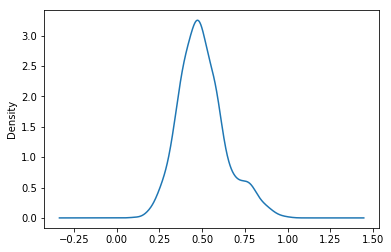

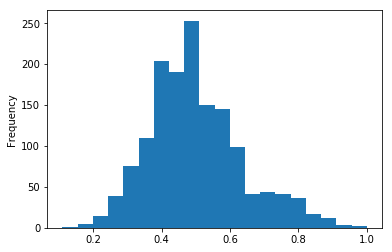

gvh


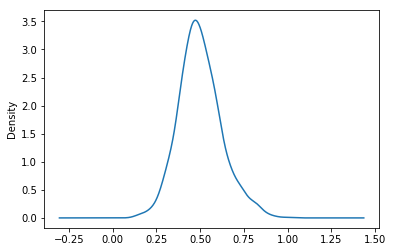

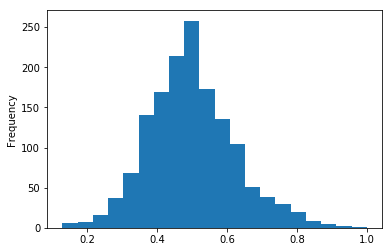

alm


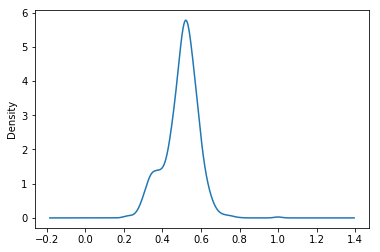

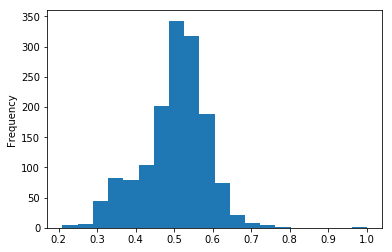

mit


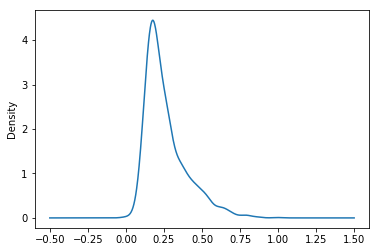

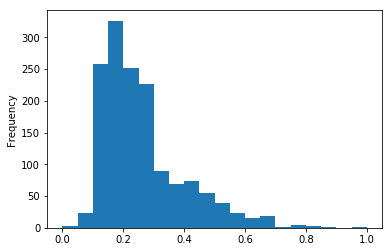

erl


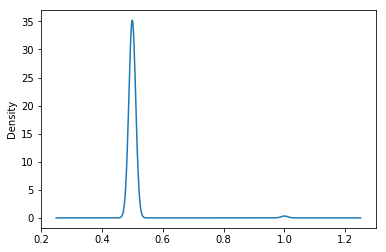

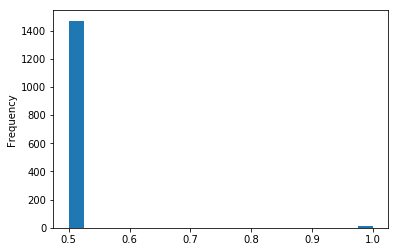

pox


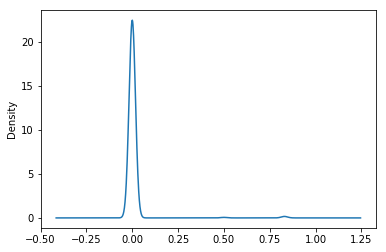

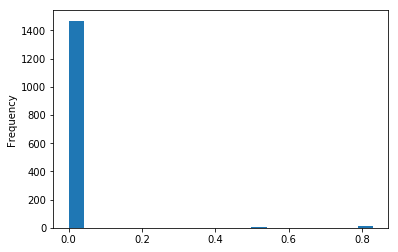

vac


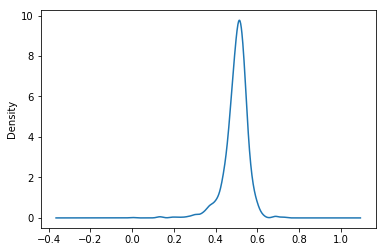

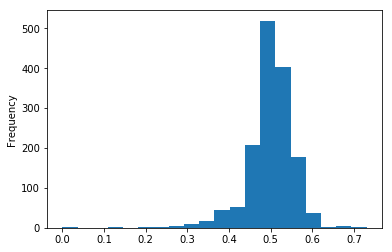

nuc


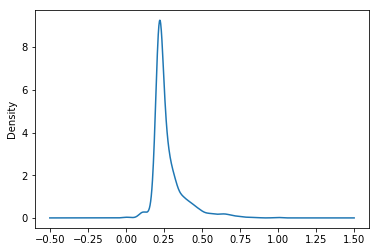

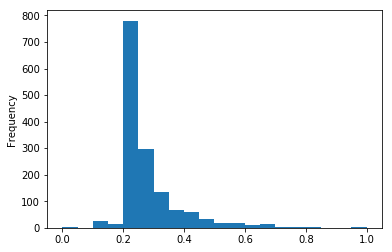

In [16]:
import matplotlib.pyplot as plt
cols = yeast_data.columns
#print(cols)
#print(type(cols))
cols = cols.drop(labels = ['sequ_name'])
for c in cols:
    print(c)
    yeast_data[c].plot(kind='density')
    plt.show()
    yeast_data[c].plot(kind='hist', bins=20)
    plt.show()

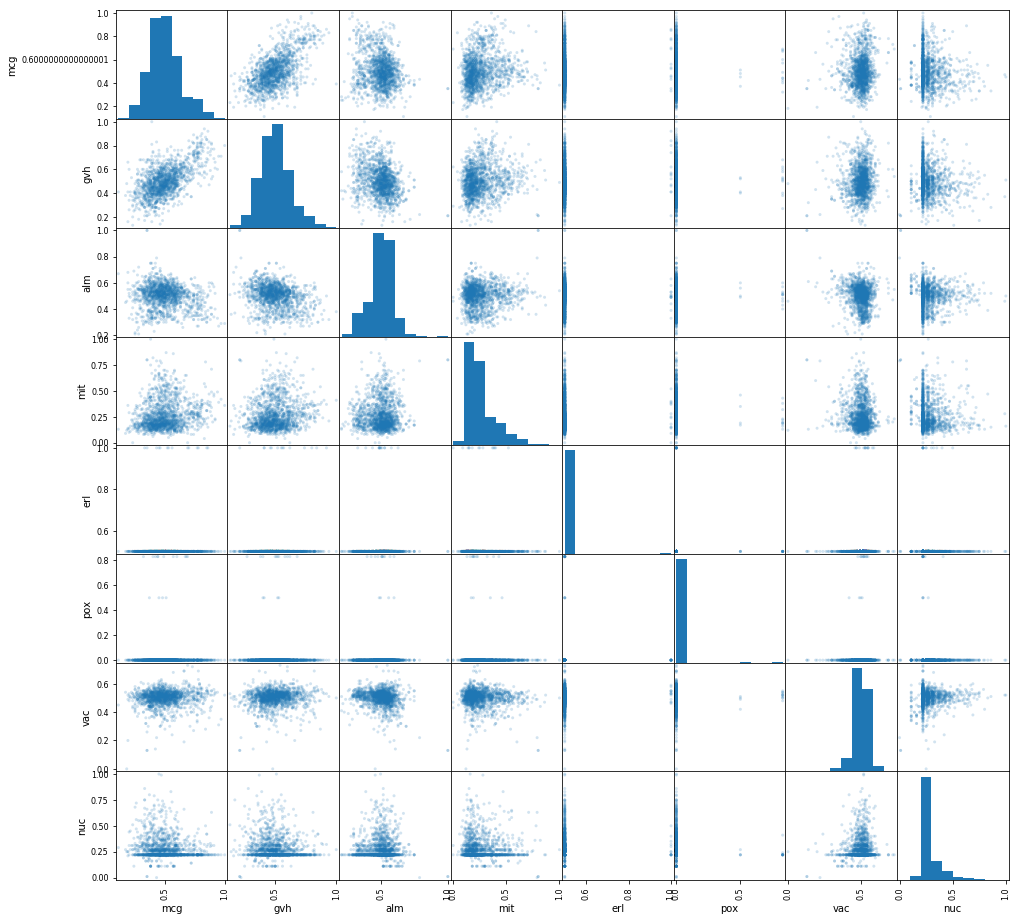

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(yeast, alpha = 0.2, figsize=(16,16), diagonal='hist')
plt.show()

### Trial modelling